In [ ]:
%load_ext lab_black

## Support Vector Machines (SVM)

<div>
<img src="figures/SVM_margin.png" width="400"/>
</div>

(figure by [Wikipedia 2018](https://en.wikipedia.org/wiki/Support_vector_machine#/media/File:SVM_margin.png) )


SVM classifies data by finding the best way to separate different groups of data in a multidimensional space. It finds the maximum margin between the closest data points of opposite groups, creating the optimal hyperplane. The number of features in the input data determines if the hyperplane is a line in a 2D space or a plane in an N-dimensional space. The SVM algorithm is used in machine learning because it can handle both linear and nonlinear classification tasks. However, when the data is not linearly separable, kernel functions are used to transform the data to enable linear separation. This is called the 'kernel trick'. The type of kernel used depends on the data and the task.

**Support Vectors**

Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

**Hyperplane**

A hyperplane is a decision plane which separates between a set of objects having different class memberships.

**Margin**

A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

**Let's get down to business**: Now you will learn about its implementation in Python using scikit-learn.

In [ ]:
# First, let's import all the needed libraries. 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")

Data Cleaning and Processing

The following library has been utilized for data processing:

* pandas: It is an open-source Python module, having a wide scope of use in the field of computing, data analysis, statistics, etc. The following techniques have been implemented for Data Processing:
* Data Type conversions
* Label Encoding
* Feature Scaling

**Feature Scaling**

Feature Scaling refers to the technique of converting the numeric data into a standard range to improvise the performance of algorithms. This is obtained by normalizing or standardizing the data values. One of the most common feature-scaling techniques is min-max scaling which will be implemented here.

Min-max scaling is a feature scaling technique that involves the subtraction of the minimum value in the attribute with each observation and then dividing this by the range of the attribute.

Here, attributes: ‘bright_t31’, ‘brightness’, and ‘frp’ undergo min-max scaling. The technique will result in the transformation of all these attributes into normalized numerical form in the range of 0 to 1.

In [18]:
def min_max(variable, xmin = None, xmax = None):
    if (xmin != None) & (xmax == None):  ## no we are able to set xmin manually
        xmax = variable.max()
        min_max_done = (variable - xmin + 1) / (xmax - xmin + 2)
        return xmin, xmax, min_max_done
    elif (xmin != None) & (xmax != None):  ## no we are able to set xmin and xmax manually
        min_max_done = (variable - xmin + 1) / (xmax - xmin + 2)
        return xmin, xmax, min_max_done
    else:
        xmin, xmax = variable.min(), variable.max()
        min_max_done = (variable - xmin + 1) / (xmax - xmin + 2)
    return xmin, xmax, min_max_done

#### Working Data Set example: Crop Recommendations

For building the SVM model we will use the Crop Recommendation Dataset. our aim is to **Maximize agricultural yield by recommending appropriate crops**. You can find this example on [kaggle here](https://www.kaggle.com/code/atharvaingle/what-crop-to-grow#Support-Vector-Machine-(SVM)) and you can download the data from [kaggle here](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset).

**About the data set:**

This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

**Data fields**

* `N` - ratio of Nitrogen content in soil
* `P` - ratio of Phosphorous content in soil
* `K` - ratio of Potassium content in soil
* `temperature` - temperature in degree Celsius
* `humidity` - relative humidity in %
* `ph` - ph value of the soil
* `rainfall` - rainfall in mm

In [19]:
## read the data into pandas df

PATH = 'Crop_recommendation.csv'
df = pd.read_csv(PATH)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [20]:
df.shape

(2200, 8)

> **Exercise**:
> 
> Whats the datatype of each column?
> 
> Find all unique crops in the `label` column!
>
> How many entries are there per label?


In [21]:
### your code here ###

##### solution

In [22]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [23]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [24]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

#### Data exploration

We will plot a correlation matrix (pearson) to quickly gain an overview of structures within our data: 

<Axes: >

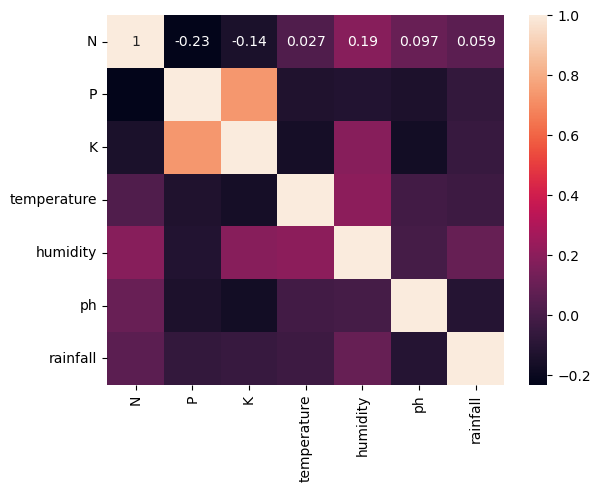

In [25]:
sns.heatmap(df.iloc[:,0:7].corr(),annot=True)

#### Ressources for this script: 

KMeans: 

* [Artley 2022](https://towardsdatascience.com/unsupervised-learning-k-means-clustering-27416b95af27)
* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)

SVM:
* [Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/svm.html)

In [1]:
from IPython.display import IFrame

IFrame(
    src="../../citations/citation_Marie.html",
    width=900,
    height=200,
)